<a href="https://colab.research.google.com/github/BeccaOY/BeccaOY/blob/main/MultiClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#load in data
import pandas as pd
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv
penguins = pd.read_csv('penguins.csv')
penguins.head()

--2021-12-28 13:06:03--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/penguins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7086 (6.9K) [text/plain]
Saving to: ‘penguins.csv’

penguins.csv        100%[===================>]   6.92K  --.-KB/s    in 0s      

2021-12-28 13:06:03 (45.4 MB/s) - ‘penguins.csv’ saved [7086/7086]



,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


In [3]:
#display a random sample of 10
penguins.sample(10)

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
154,48.7,14.1,210.0,4450.0,1
226,46.4,15.0,216.0,4700.0,1
260,43.3,14.0,208.0,4575.0,1
19,46.0,21.5,194.0,4200.0,0
162,40.9,13.7,214.0,4650.0,1
129,44.1,18.0,210.0,4000.0,0
149,37.8,18.1,193.0,3750.0,0
66,35.5,16.2,195.0,3350.0,0
86,36.3,19.5,190.0,3800.0,0
59,37.6,19.1,194.0,3750.0,0


In [5]:
penguins.isnull().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

In [10]:
#which specific rows?
penguins[penguins.isnull().any(axis = 1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [12]:
#drop roles with na
penguin = penguins.dropna()
penguin.isnull().any()

CulmenLength     False
CulmenDepth      False
FlipperLength    False
BodyMass         False
Species          False
dtype: bool

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

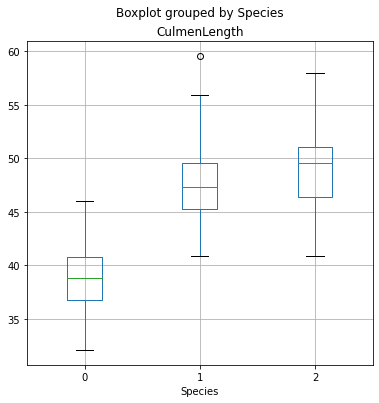

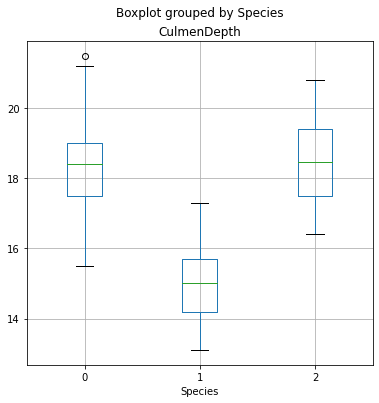

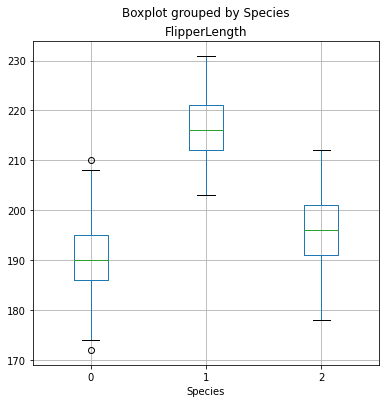

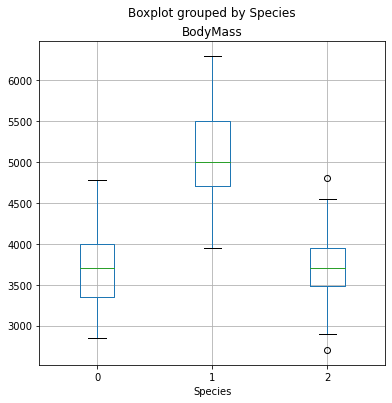

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline

penguin_features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
penguin_label = 'Species'
for col in penguin_features:
    penguins.boxplot(column=col, by=penguin_label, figsize=(6,6))
    plt.title(col)
plt.show()

In [22]:
#separate features and labels
from sklearn.model_selection import train_test_split

penguin_x, penguin_y = penguin[penguin_features].values, penguin[penguin_label].values

x_train,x_test,y_train,y_test = train_test_split(penguin_x, penguin_y,test_size= .33, stratify= penguin_y)
print('Train: ', x_train.shape)
print('Test: ', x_test.shape)

Train:  (229, 4)
Test:  (113, 4)


In [23]:
#train and evaluate multiclass model
from sklearn.linear_model import LogisticRegression
#set regularization
reg = .01
model = 